<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

## Problem Statement

### *Investigating the Relationship Between Economic Resources and Life Expectancy to Inform Strategic Decision-Making*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

### Understanding Pearson correlation coefficient
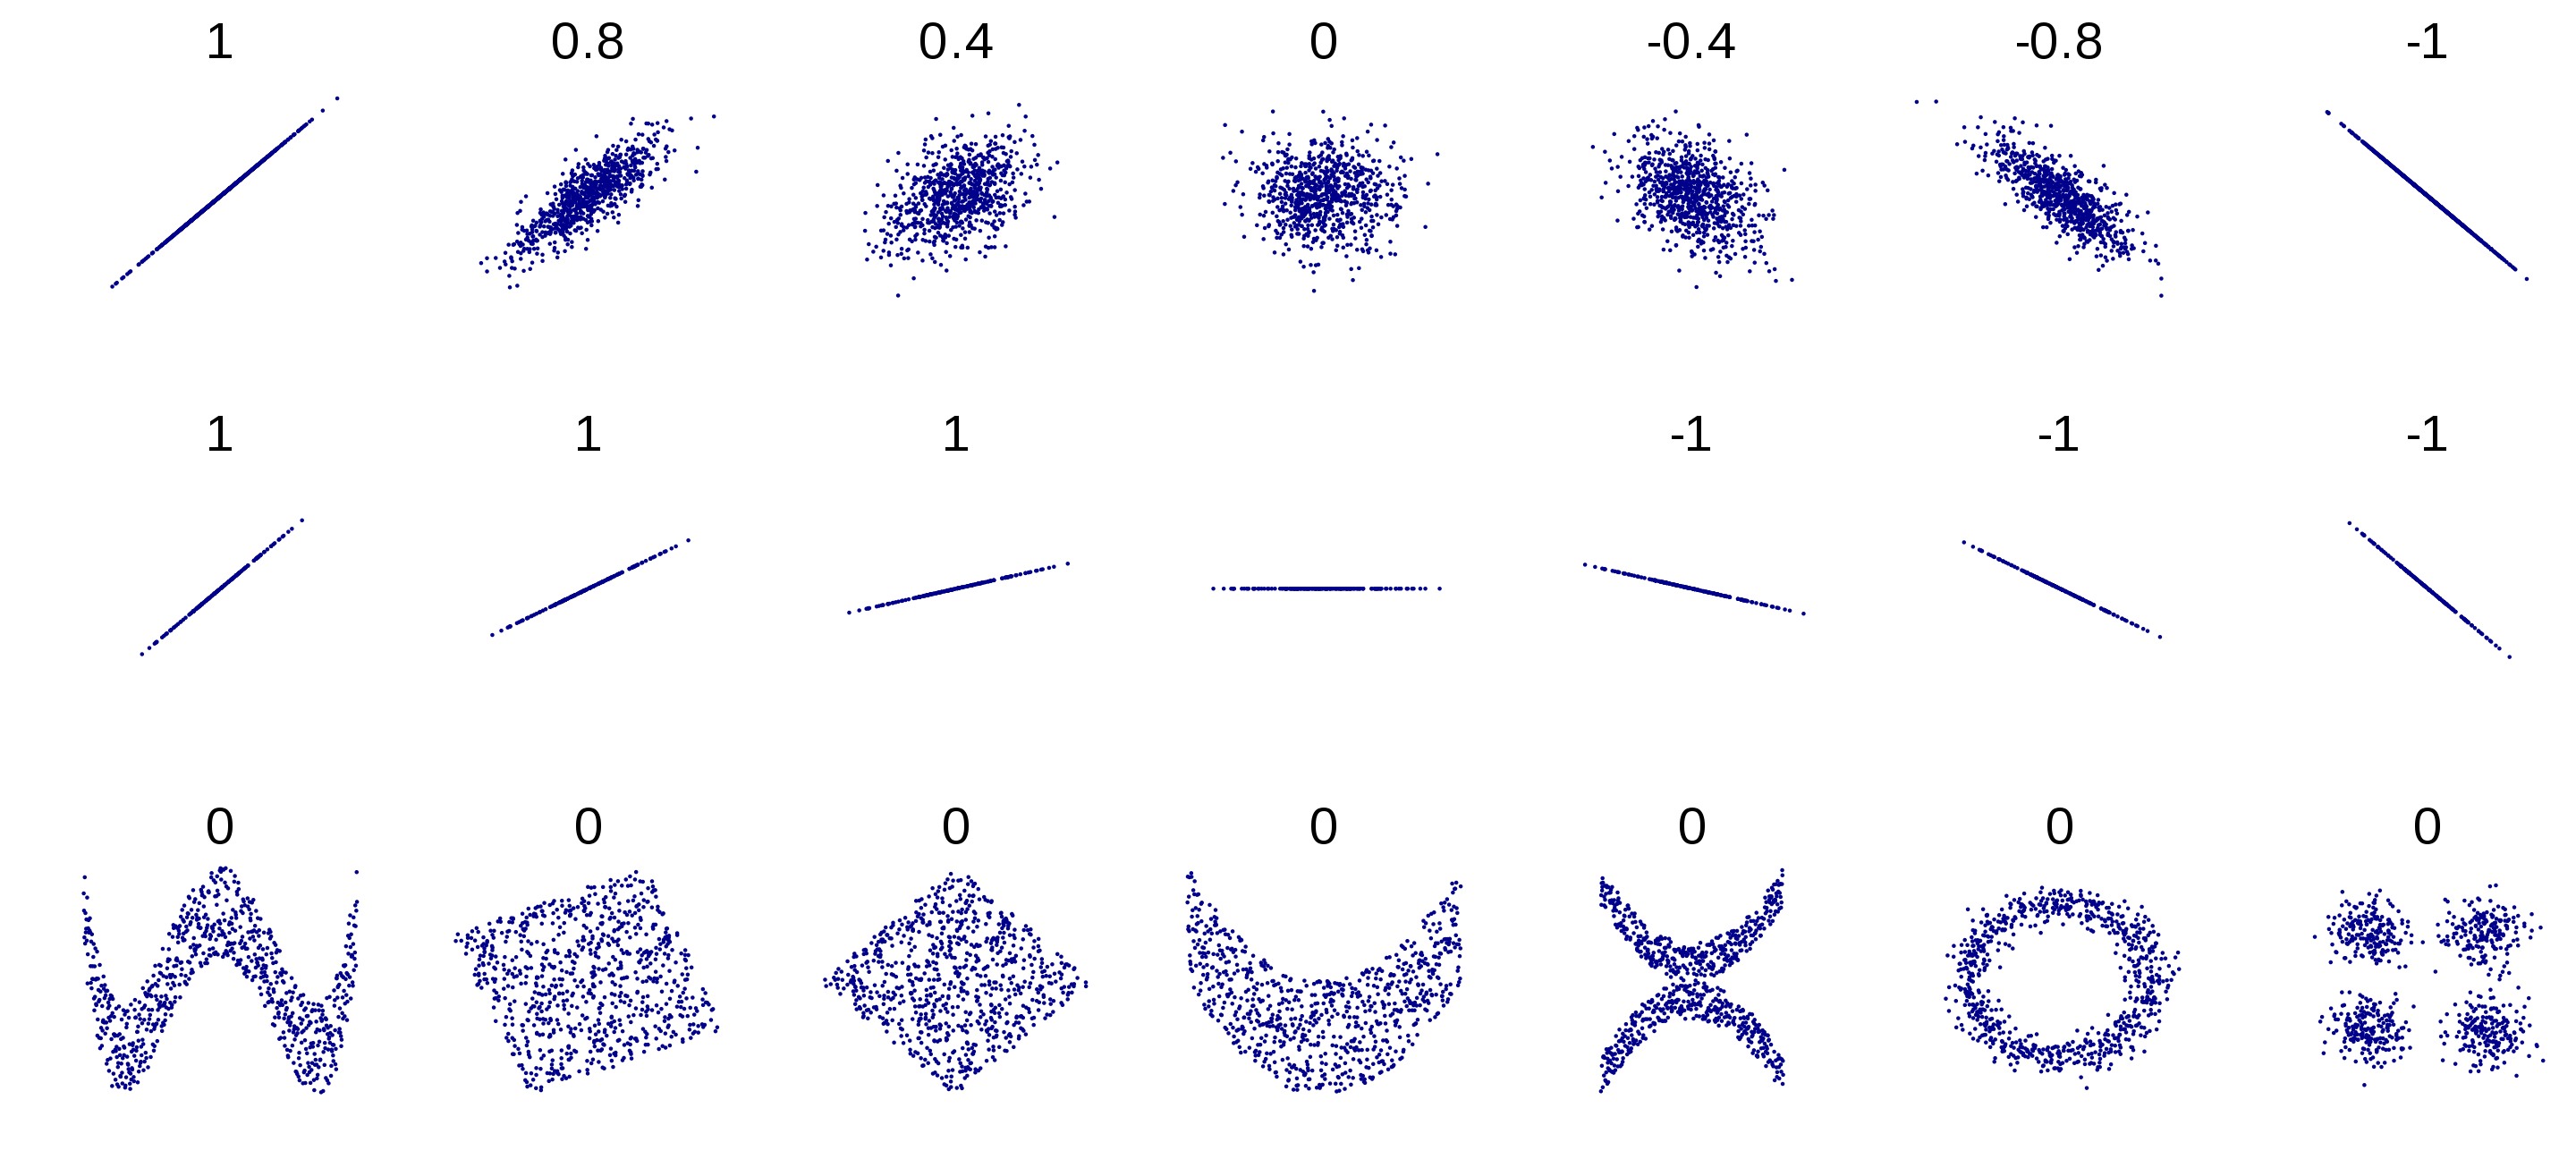

Retrieved from: https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg


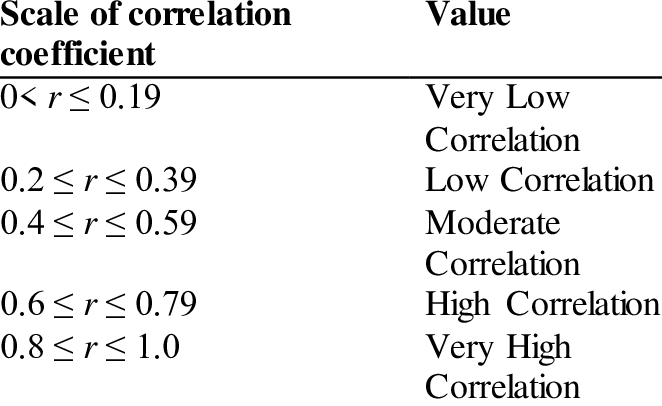

Retrieved from: Selvanathan, M. (2020, October 28). The scale of Pearson’s Correlation Coefficient. ResearchGate; ResearchGate. https://www.researchgate.net/figure/The-scale-of-Pearsons-Correlation-Coefficient_tbl1_345693737

‌


### Choose your Data


The dataset that will be choosen for analysis will be **gni_per_cap_atlas_method_con2021.csv** and **life_expectancy.csv.**

**gni_per_cap_atlas_method_con2021.csv** "GNI per capita" stands for Gross National Income per capita. The dataset has information to assess the average economic output per person in a country. The columns has the year from 1800 to 2050 and rows of the countries. GNI per capita is a useful metric for understanding the average economic well-being of the citizens of a country. Higher GNI per capita generally indicates a higher standard of living, while lower GNI indicates a lower standard of living.

**life_expectancy.csv.** dataset includes information about life expectancy at birth for different countries. The columns that are present in the dataset are Countries (Names identifying the countries for which life expectancy data is reported) and the Year (the year for which life expectancy data is recorded). The values shows the average number of years a newborn can expect to live, usually measured at birth.

### Outside Research

### For Life Expectency, Econimic Wealth Matters!

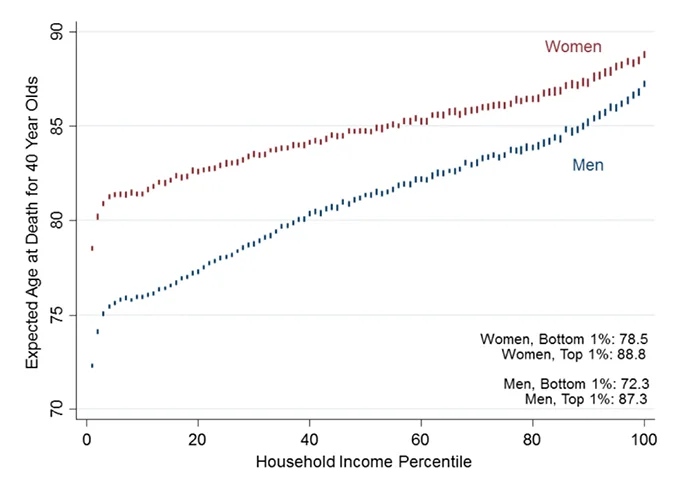

The richest American men live 15 years longer than the poorest men, while the richest American women live 10 years longer than the poorest women, according to the Health Inequality Project (Reuell, 2016. Graphic courtesy of David Cutler 

Reuell, P. (2016, April 11). For life expectancy, money matters. Harvard Gazette; Harvard Gazette. https://news.harvard.edu/gazette/story/2016/04/for-life-expectancy-money-matters/

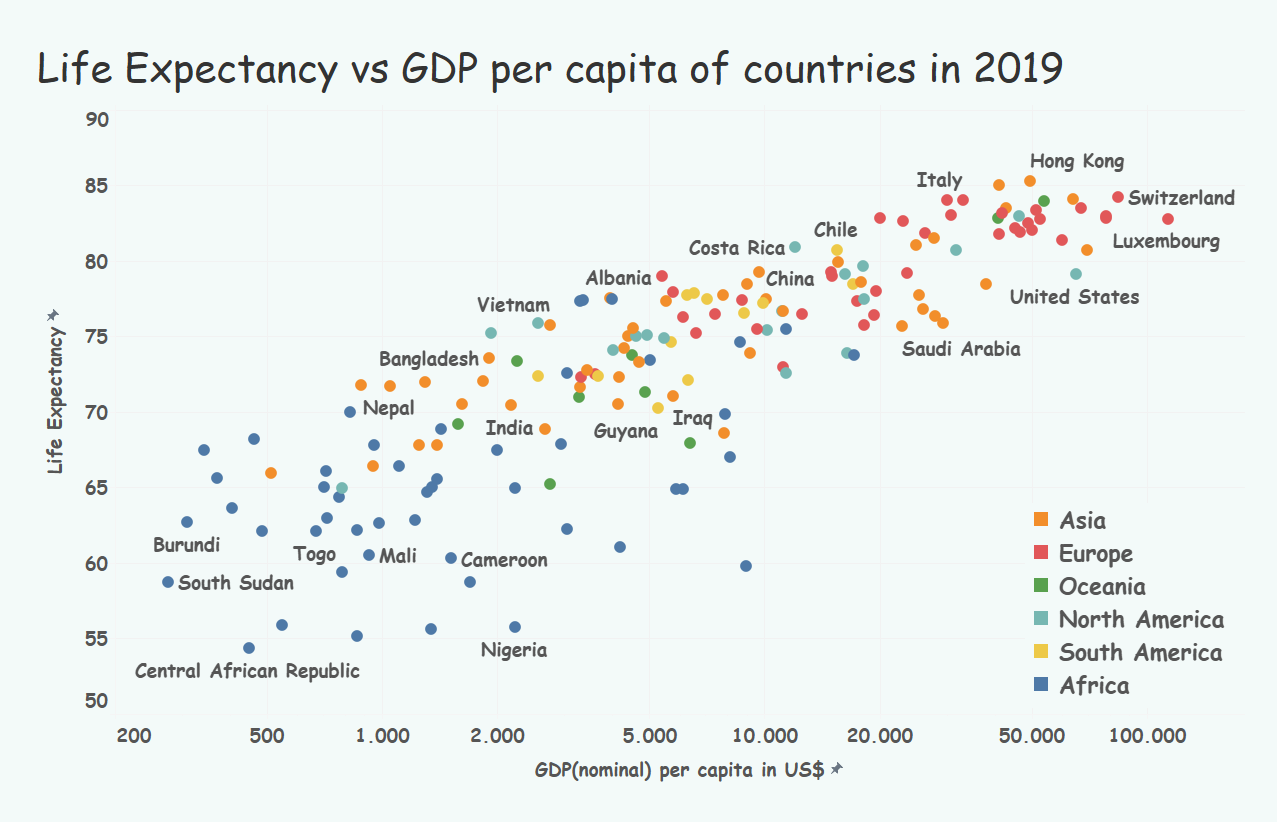

Source: International Monetary Fund GDP per capita 2019, United Nations Human Development Report 2019

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def mean_calculator(nums):
    
    #makes sure that the list is not empty to avoid division by 0 can use lens as well e.g. if len(num)==0
    if not nums:
        return None # return none or raise exception
    else:
        total_sum = 0
        count = 0
    
    for i in nums:
        total_sum += i
        count += 1
    
    #can also use  mean = total_sum/len(nums)
    mean = total_sum/count
    return mean

list_test_numbers = [5, 2, 8, 5, 9, 2, 10]
result_mean = mean_calculator(list_test_numbers)

print(f'The mean is: {result_mean}')

The mean is: 5.857142857142857


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:

def standard_deviation_calculator(n):
    if not n:
        return None
    else:
        mean_all_value = mean_calculator(n) #calculate the mean using previously defined function
        
        squared_diff_sum = 0
        count = 0
        
        for value in n:
            squared_diff_sum += (value - mean_all_value)**2
            count += 1
            
            #calulating the variance
            variance = squared_diff_sum/count
            #calulating standard deviation e.g., math.sqrt(variance)
            standard_deviation = variance ** 0.5
            
            return standard_deviation
        
result_standard_deviation = standard_deviation_calculator(list_test_numbers)

print(f'The standard deviation is: {result_standard_deviation}')
    

The standard deviation is: 0.8571428571428568


3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
#code logic utilized from https://levelup.gitconnected.com/how-to-format-integers-into-string-representations-in-python-9f6ad0f2d36f
#alternative could use the pip install numerize https://www.geeksforgeeks.org/python-numerize-library/

def str_int_convertion(input_str):
    #added for dataframe to keep non float value as well
    if isinstance(input_str, (float, int)):
        return input_str
    
    # used the try except too handle the TypeError I was getting that happened during the float/ conversion. 
    #If the conversion fails, it returns the original value.
    
    try:
        float_numeric_conv = float(input_str[:-1]) # convert to float to handle decimals num, disregarding last element
    except ValueError:
        return input_str
    
    multiplier_placement =  input_str[-1].upper() # handle case insensitivity

    #formatting large value in key value pair logic from https://stackoverflow.com/questions/5413985/python-formatting-large-values
    str_int_dic = {'K':1e3, 'M':1e6, 'B':1e9, 'T':1e12}
    
    # Ensure the mulitplier placement is in the right element, if not return an exception
    if multiplier_placement not in str_int_dic:
        return input_str
        
    result = int(float_numeric_conv * str_int_dic[multiplier_placement]) 
    
    return result


test_numbers = ['5M', '45k', '5.5B']

# loops through each test numbers as input and output the new format result
for i in test_numbers:
    result = str_int_convertion(i)
    print(f"Input: {i}, Output: {result}")

Input: 5M, Output: 5000000
Input: 45k, Output: 45000
Input: 5.5B, Output: 5500000000


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [86]:
# Imports: 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


## Data Import and Cleaning

In [6]:
#Import the datasets
#Had error reading the file path...Had to download csv onto desktop
#copy path from Finder app and then pasted it in the file path statement to make it work

file_path = '/Users/aamad_000/Desktop/csv_folder/gni_per_cap_atlas_method_con2021.csv'
file_path2 = '/Users/aamad_000/Desktop/csv_folder/life_expectancy.csv'

gni_df = pd.read_csv(file_path)
life_df = pd.read_csv(file_path2)

In [7]:
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
gni_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [8]:
life_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [9]:
# 2. Check for missing values.

life_df.isnull().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [10]:
missing_values_gni = gni_df.isnull().sum()
print(missing_values_gni)

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64


In [11]:
#3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
# Fix any errors you identified in steps 2-3.
gni_df.shape

(191, 252)

In [12]:
life_df.shape

(195, 302)

In [13]:
#8 Drop unnecessary rows (if needed).
gni_df.dropna(inplace = True)
gni_df.shape

(190, 252)

In [14]:
#8 Drop unnecessary rows (if needed).

life_df.dropna(inplace = True)
life_df.shape

(186, 302)

In [15]:
gni_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [17]:
#6. Fix any incorrect data types found in step 5.
#Fix any individual values preventing other columns from being the appropriate type.
#If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), 
#use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! 
#Hint: use .map() or .apply().

#code logic retrieve from https://sparkbyexamples.com/pandas/pandas-apply-map/
#convert the values in multiple columns of gni_df
#from strings to integers.

#represent the range of years
start_year = 1800
end_year = 2050

#list comprehension that creates a list of column names as strings, 
# where each string corresponds to a year within the specified range.
columns_to_convert = [str(year) for year in range(start_year, end_year + 1)]

#selects the subset of columns
#from the DataFrame based on the list of column names.
# applies a function (str_int_conversion) to each element in the selected subset of columns
gni_df[columns_to_convert] = gni_df[columns_to_convert].applymap(str_int_convertion)


In [18]:
gni_df['2043'].unique()

array(['783', '2890', 10000, 50000, 13400, '8280', 23200, 82400, 75700,
       '6260', '309', 70100, '2330', '1290', '4930', 18500, 29200, 40200,
       11200, '9940', '5760', '5220', 12200, 24800, 49800, '5570', 11000,
       '850', 64800, 117000, 21700, 23100, '4190', '2560', '813', '2150',
       10100, '1800', '6430', 18700, 15100, 40400, 38900, 73600, '5810',
       11900, 98100, 14200, '4640', '7900', '5470', '733', 44400, 42000,
       '2040', 76100, '9470', 62100, '5390', 11500, 63100, '9250', '4050',
       '1710', '1310', '1280', '4730', 30200, 15500, '6920', 13900, 82000,
       '3510', 27500, '1760', 28900, '7740', '4610', 107000, '4360',
       '6770', 101000, 66200, 49700, '7970', '7160', 61900, '3540',
       '1900', '3290', '4070', 32700, 55200, 41800, '5020', '4630', '981',
       19400, 14000, '6880', '1740', 33400, 33600, '5120', 10800, '782',
       16000, 13100, '7060', 10700, '1320', 48900, '2290', 15200, '6940',
       '867', '2700', 19900, '1000', 20700, '5790',

In [19]:
#5. Display the data types of each feature.

gni_df.dtypes.value_counts()

object     155
float64     97
Name: count, dtype: int64

In [20]:
life_df.dtypes.value_counts()

float64    301
object       1
Name: count, dtype: int64

In [21]:
life_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


In [23]:
print(life_df.columns)

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)


In [24]:
print(gni_df.columns)

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=252)


In [25]:
#8. Merge dataframes that can be merged.
#merged_df = pd.merge(gni_df, life_df, left_on='country', right_on='country' )

row_to_merge = ['Japan', 'Nigeria', 'United Kingdom']
column_to_merge = [str(year) for year in range(2000, 2025)]

#logic attained from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

#checks whether the 'country' column in the DataFrame gni_df has values 
# that are present in the list row_to_merge
#then creates a list of column names by concatenating the 'country' 
#column with the list of columns specified in column_to_merge.
# thenn assign it to a new dataframe called gni_subset
gni_subset = gni_df[gni_df['country'].isin(row_to_merge)][['country'] + column_to_merge]


#same logic applied above
life_subset = life_df[life_df['country'].isin(row_to_merge)][['country'] + column_to_merge]

#merged the two subset baseed on common country column
merged_df = pd.merge(gni_subset, life_subset, on='country')



In [26]:
print(merged_df)

          country 2000_x 2001_x 2002_x 2003_x 2004_x 2005_x 2006_x 2007_x  \
0  United Kingdom  43900  42500  42500  45000  49600  54200  56200  59000   
1           Japan  54300  54000  50700  48900  50200  51400  49700  48000   
2         Nigeria    705    778    918    990   1140   1300   1680   2000   

  2008_x  ... 2015_y 2016_y 2017_y 2018_y 2019_y 2020_y 2021_y 2022_y 2023_y  \
0  59000  ...   81.0   81.1   81.2   81.0   81.1   79.4   81.3   81.4   81.6   
1  47000  ...   84.3   84.5   84.7   84.8   84.8   84.7   85.1   85.2   85.3   
2   2390  ...   62.1   62.7   63.3   63.8   64.3   64.5   65.1   65.5   65.8   

  2024_y  
0   81.7  
1   85.4  
2   66.2  

[3 rows x 51 columns]


In [29]:
#10 Perform any additional cleaning that you feel is necessary.
#renamed column so x becomes gni and y becomes life expectency
#couldn't find easier method other than dictionary, will need to do more research later not enough time

column_mapping = {
    'country': 'country',
    '2000_x': '2000_gni', '2001_x': '2001_gni', '2002_x': '2002_gni', '2003_x': '2003_gni',
    '2004_x': '2004_gni', '2005_x': '2005_gni', '2006_x': '2006_gni', '2007_x': '2007_gni',
    '2008_x': '2008_gni', '2009_x': '2009_gni', '2010_x': '2010_gni', '2011_x': '2011_gni',
    '2012_x': '2012_gni', '2013_x': '2013_gni', '2014_x': '2014_gni', '2015_x': '2015_gni',
    '2016_x': '2016_gni', '2017_x': '2017_gni', '2018_x': '2018_gni', '2019_x': '2019_gni',
    '2020_x': '2020_gni', '2021_x': '2021_gni', '2022_x': '2022_gni', '2023_x': '2023_gni',
    '2024_x': '2024_gni',
    '2000_y': '2000_life', '2001_y': '2001_life', '2002_y': '2002_life', '2003_y': '2003_life',
    '2004_y': '2004_life', '2005_y': '2005_life', '2006_y': '2006_life', '2007_y': '2007_life',
    '2008_y': '2008_life', '2009_y': '2009_life', '2010_y': '2010_life', '2011_y': '2011_life',
    '2012_y': '2012_life', '2013_y': '2013_life', '2014_y': '2014_life', '2015_y': '2015_life',
    '2016_y': '2016_life', '2017_y': '2017_life', '2018_y': '2018_life', '2019_y': '2019_life',
    '2020_y': '2020_life', '2021_y': '2021_life', '2022_y': '2022_life', '2023_y': '2023_life',
    '2024_y': '2024_life'
}



In [30]:
merged_df = merged_df.rename(columns=column_mapping)
print(merged_df.columns)

Index(['country', '2000_gni', '2001_gni', '2002_gni', '2003_gni', '2004_gni',
       '2005_gni', '2006_gni', '2007_gni', '2008_gni', '2009_gni', '2010_gni',
       '2011_gni', '2012_gni', '2013_gni', '2014_gni', '2015_gni', '2016_gni',
       '2017_gni', '2018_gni', '2019_gni', '2020_gni', '2021_gni', '2022_gni',
       '2023_gni', '2024_gni', '2000_life', '2001_life', '2002_life',
       '2003_life', '2004_life', '2005_life', '2006_life', '2007_life',
       '2008_life', '2009_life', '2010_life', '2011_life', '2012_life',
       '2013_life', '2014_life', '2015_life', '2016_life', '2017_life',
       '2018_life', '2019_life', '2020_life', '2021_life', '2022_life',
       '2023_life', '2024_life'],
      dtype='object')


In [31]:
merged_df.head().T

,0,1,2
country,United Kingdom,Japan,Nigeria
2000_gni,43900,54300,705
2001_gni,42500,54000,778
2002_gni,42500,50700,918
2003_gni,45000,48900,990
2004_gni,49600,50200,1140
2005_gni,54200,51400,1300
2006_gni,56200,49700,1680
2007_gni,59000,48000,2000
2008_gni,59000,47000,2390


In [52]:
#11. Save your cleaned and merged dataframes as csv files.

merged_df.to_csv('merged_data.csv', index=False)

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|Merged| Name of the countries (Japan, United Kingdom, and Nigeria selected)
|year_gni|int|Merged|Gross National Income for the specifed year
|year_life|float|Merged|Life expectency for the specified year



## Exploratory Data Analysis


In [32]:
file_path3 = '/Users/aamad_000/Desktop/csv_folder/jpn_uk_nig_merged_data.csv'

merged_df1 = pd.read_csv(file_path3)

### Summary Statistics.

In [33]:
merged_df1.head()

,country,2000_gni,2001_gni,2002_gni,2003_gni,2004_gni,2005_gni,2006_gni,2007_gni,2008_gni,...,2015_life,2016_life,2017_life,2018_life,2019_life,2020_life,2021_life,2022_life,2023_life,2024_life
0,United Kingdom,43900,42500,42500,45000,49600,54200,56200,59000,59000,...,81.0,81.1,81.2,81.0,81.1,79.4,81.3,81.4,81.6,81.7
1,Japan,54300,54000,50700,48900,50200,51400,49700,48000,47000,...,84.3,84.5,84.7,84.8,84.8,84.7,85.1,85.2,85.3,85.4
2,Nigeria,705,778,918,990,1140,1300,1680,2000,2390,...,62.1,62.7,63.3,63.8,64.3,64.5,65.1,65.5,65.8,66.2


In [34]:
merged_df1.describe()

,2000_gni,2001_gni,2002_gni,2003_gni,2004_gni,2005_gni,2006_gni,2007_gni,2008_gni,2009_gni,...,2015_life,2016_life,2017_life,2018_life,2019_life,2020_life,2021_life,2022_life,2023_life,2024_life
count,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,32968.333333,32426.00000,31372.666667,31630.000000,33646.666667,35633.333333,35860.000000,36333.333333,36130.000000,34153.333333,...,75.800000,76.100000,76.400000,76.533333,76.733333,76.200000,77.166667,77.366667,77.566667,77.766667
std,28420.626459,28004.63226,26691.291489,26606.572496,28153.197569,29766.480029,29778.629921,30237.945256,29829.359698,27657.015988,...,11.978731,11.728598,11.479111,11.189876,10.925353,10.473299,10.621362,10.450997,10.356801,10.186429
min,705.000000,778.00000,918.000000,990.000000,1140.000000,1300.000000,1680.000000,2000.000000,2390.000000,2460.000000,...,62.100000,62.700000,63.300000,63.800000,64.300000,64.500000,65.100000,65.500000,65.800000,66.200000
25%,22302.500000,21639.00000,21709.000000,22995.000000,25370.000000,26350.000000,25690.000000,25000.000000,24695.000000,24530.000000,...,71.550000,71.900000,72.250000,72.400000,72.700000,71.950000,73.200000,73.450000,73.700000,73.950000
50%,43900.000000,42500.00000,42500.000000,45000.000000,49600.000000,51400.000000,49700.000000,48000.000000,47000.000000,46600.000000,...,81.000000,81.100000,81.200000,81.000000,81.100000,79.400000,81.300000,81.400000,81.600000,81.700000
75%,49100.000000,48250.00000,46600.000000,46950.000000,49900.000000,52800.000000,52950.000000,53500.000000,53000.000000,50000.000000,...,82.650000,82.800000,82.950000,82.900000,82.950000,82.050000,83.200000,83.300000,83.450000,83.550000
max,54300.000000,54000.00000,50700.000000,48900.000000,50200.000000,54200.000000,56200.000000,59000.000000,59000.000000,53400.000000,...,84.300000,84.500000,84.700000,84.800000,84.800000,84.700000,85.100000,85.200000,85.300000,85.400000


In [64]:
merged_df1.shape

(3, 51)

In [233]:
#2.  Use a dictionary comprehension to apply the standard deviation function 
#you create in part 1 to each numeric column in one of your dataframes. 
#No loops.

#Assign the output to variable sd as a dictionary where:
#Each column name is now a key
#That standard deviation of the column is the value
#Example Output : {'1801': 3.80, '1802': 3.93, ...}



# Define the standard deviation calculator function
def standard_deviation_calculator(n):
    if len(n) > 0:
        mean_all_value = n.mean()
        squared_diff_sum = ((n - mean_all_value) ** 2).sum()
        count = len(n)
        variance = squared_diff_sum / count
        standard_deviation = np.sqrt(variance)
        return standard_deviation
    else:
        return 0.0  # Return 0.0 when there is no data

# Separate the GNI and life expectancy columns
gni_columns = merged_df.columns[merged_df.columns.str.endswith('_gni')]
life_columns = merged_df.columns[merged_df.columns.str.endswith('_life')]

# Convert columns to numeric logic from https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
merged_df[gni_columns] = merged_df[gni_columns].apply(pd.to_numeric, errors='coerce')
merged_df[life_columns] = merged_df[life_columns].apply(pd.to_numeric, errors='coerce')

# Calculate standard deviation for GNI and life expectancy separately
gni_sd = merged_df[gni_columns].apply(standard_deviation_calculator)
life_sd = merged_df[life_columns].apply(standard_deviation_calculator)

# Combine the results into a dictionary
sd_dict = {f"{year}_gni": value for year, value in zip(gni_sd.index.str[:-4], gni_sd)}
sd_dict.update({f"{year}_life": value for year, value in zip(life_sd.index.str[:-5], life_sd)})

print(sd_dict)


    




{'2000_gni': 23205.344331760203, '2001_gni': 22865.686490168333, '2002_gni': 21793.34824104721, '2003_gni': 21724.17547342131, '2004_gni': 22986.989556896937, '2005_gni': 24304.229170157927, '2006_gni': 24314.149515594137, '2007_gni': 24689.17891618827, '2008_gni': 24355.57020478067, '2009_gni': 22581.858992464626, '2010_gni': 22727.58285040937, '2011_gni': 23133.706048870674, '2012_gni': 23378.104190792623, '2013_gni': 22797.107028938757, '2014_gni': 21526.808092856376, '2015_gni': 20574.865464660732, '2016_gni': 20175.727991822252, '2017_gni': 19607.41583063805, '2018_gni': 19552.78667266297, '2019_gni': 19475.03187845059, '2020_gni': 17939.21836523419, '2021_gni': 18714.93758709574, '2022_gni': 19469.691545807524, '2023_gni': 19781.186909676464, '2024_gni': 20064.014774936968, '2000_life': 11.969962405956, '2001_life': 12.016747572543174, '2002_life': 11.998425822674498, '2003_life': 11.858143006202763, '2004_life': 11.75443178833697, '2005_life': 11.529382753064738, '2006_life': 11

### Which country had the highest life expectancy in the latest available year?

In [42]:


#contains all column name from merged_df1 that ends with _life
life_columns = [col for col in merged_df1.columns if col.endswith('_life')]

# output only the countries life expectencies, sorted by year_life column
top_countries_life = merged_df1[['country'] + life_columns].sort_values(by=life_columns[-1], ascending=False).head()
print(top_countries_life)


          country  2000_life  2001_life  2002_life  2003_life  2004_life  \
1           Japan       81.6       81.9       82.2       82.3       82.5   
0  United Kingdom       78.0       78.3       78.5       78.6       79.0   
2         Nigeria       54.6       54.8       55.1       55.5       56.0   

   2005_life  2006_life  2007_life  2008_life  ...  2015_life  2016_life  \
1       82.5       82.8       82.9       83.1  ...       84.3       84.5   
0       79.3       79.5       79.8       80.0  ...       81.0       81.1   
2       56.6       57.2       57.9       58.5  ...       62.1       62.7   

   2017_life  2018_life  2019_life  2020_life  2021_life  2022_life  \
1       84.7       84.8       84.8       84.7       85.1       85.2   
0       81.2       81.0       81.1       79.4       81.3       81.4   
2       63.3       63.8       64.3       64.5       65.1       65.5   

   2023_life  2024_life  
1       85.3       85.4  
0       81.6       81.7  
2       65.8       66.2  



In [63]:
# Finding the country with the highest life expectancy across all years
top_country_life = merged_df1[['country'] + life_columns].set_index('country').max(axis=1)
highest_life_country = top_country_life.idxmax()
highest_life_value = top_country_life.max()

print(f"The country with the highest life expectancy is {highest_life_country} \
with a value of {highest_life_value}.")


The country with the highest life expectancy is Japan with a value of 85.4.


### Which country had the lowest life expectancy in the latest available year?

In [59]:
# same logic as above just used .min function
bottom_country_life = merged_df1[['country'] + life_columns].set_index('country').min(axis=1)
lowest_life_country = bottom_country_life.idxmin()
lowest_life_value = bottom_country_life.min()

print(f"The country with the lowest life expectancy is {lowest_life_country} \
with a value of {lowest_life_value}.")


The country with the lowest life expectancy is Nigeria with a value of 54.6.


#### Which country had the highest gni in the latest available year?

In [43]:


gni_columns = [col for col in merged_df1.columns if col.endswith('_gni')]

# output only the countries life expectencies, sorted by year_life column
top_countries_gni = merged_df1[['country'] + gni_columns].sort_values(by=gni_columns[-1], ascending=False).head()
print(top_countries_gni)

          country  2000_gni  2001_gni  2002_gni  2003_gni  2004_gni  2005_gni  \
0  United Kingdom     43900     42500     42500     45000     49600     54200   
1           Japan     54300     54000     50700     48900     50200     51400   
2         Nigeria       705       778       918       990      1140      1300   

   2006_gni  2007_gni  2008_gni  ...  2015_gni  2016_gni  2017_gni  2018_gni  \
0     56200     59000     59000  ...     49700     48300     45600     44200   
1     49700     48000     47000  ...     43100     42000     41900     42800   
2      1680      2000      2390  ...      3130      2700      2280      2040   

   2019_gni  2020_gni  2021_gni  2022_gni  2023_gni  2024_gni  
0     44300     39700     41600     43500     44200     44800  
1     42400     40400     41800     43100     43700     44300  
2      2070      2000      2000      2000      1990      1990  

[3 rows x 26 columns]


In [68]:
# Finding the country with the highest GNI across all years
top_country_gni = merged_df1[['country'] + gni_columns].set_index('country').max(axis=1)
highest_gni_country = top_country_gni.idxmax()
highest_gni_value = top_country_gni.max()

print(f"The country with the highest GNI is {highest_gni_country} \
with a value of {highest_gni_value}.")


The country with the highest GNI is United Kingdom with a value of 59000.


### Which country had the lowest gni in the latest available year?

In [71]:
# same logic as above, just changed min and max value
bottom_country_gni = merged_df1[['country'] + gni_columns].set_index('country').min(axis=1)
lowest_gni_country = bottom_country_gni.idxmin()
lowest_gni_value = bottom_country_gni.min()

print(f"The country with the lowest GNI is {lowest_gni_country} \
with a value of {lowest_gni_value}.")



The country with the lowest GNI is Nigeria with a value of 705.


### Correlation Between GNI and Life Expectancy

In [49]:
gni_and_life_df = merged_df1[['country'] + gni_columns + life_columns]
correlation_matrix = gni_and_life_df.corr(numeric_only = True)

print(correlation_matrix)

           2000_gni  2001_gni  2002_gni  2003_gni  2004_gni  2005_gni  \
2000_gni   1.000000  0.999740  0.999557  0.993885  0.985013  0.973426   
2001_gni   0.999740  1.000000  0.998618  0.991110  0.980827  0.967954   
2002_gni   0.999557  0.998618  1.000000  0.996732  0.989713  0.979814   
2003_gni   0.993885  0.991110  0.996732  1.000000  0.998035  0.992760   
2004_gni   0.985013  0.980827  0.989713  0.998035  1.000000  0.998335   
2005_gni   0.973426  0.967954  0.979814  0.992760  0.998335  1.000000   
2006_gni   0.957278  0.950439  0.965465  0.983354  0.992807  0.998060   
2007_gni   0.933440  0.925022  0.943709  0.967343  0.981325  0.990785   
2008_gni   0.926223  0.917392  0.937039  0.962185  0.977363  0.987938   
2009_gni   0.953169  0.946029  0.961753  0.980736  0.991048  0.997098   
2010_gni   0.988248  0.984508  0.992362  0.999084  0.999802  0.996991   
2011_gni   0.997493  0.995622  0.999158  0.999207  0.994749  0.987190   
2012_gni   0.999447  0.998430  0.999994  0.997007  

In [52]:
merged_df1[['2018_gni', '2018_life']].corr()

,2018_gni,2018_life
2018_gni,1.000000,0.980095
2018_life,0.980095,1.000000




### Observation of data

- The country with the highest life expectancy is Japan in the year 2024_life with a value of 85.4.
- The country with the highest gni is United Kingdom in the year 2007_gni and 2008_gni with a value of 59000.
- The country with the lowest life expectancy is Nigeria in the year 2000_life with a value of 54.6.
- Thhe country with the lowest gni is Nigeria in the year 2000_gni with a value of 705.


### Specific Observation on Correlation data:

- Generally high positive correlation between consecutive years for both "gni" and "life."
- Correlations are consistently high between "gni" and "life" for the same year (0.8 <= r <= 1.0 which indicates very highly correlation based of the scale of correlation coefficent chart).
- All positive value suggests a positive relationship

### Conclusion based of problem statement of Investigating the Relationship Between Economic Resources and Life Expectancy to Inform Strategic Decision-Making 


1. The correlation between GNI and life expetency, tends to increase over the years. If you look at the diagonal elements, there is an increasing trend, which would suggest that the relationship between GNI and life expectency is becoming stronger over time. 
2. The most recent years such as 2020, 2021, 2022, and 2023 shows high correlation between GNI and life expectency. This could indicate that econmic prosperity is playing a significant role in determining life expectency
3. The positive values of correlation indicate a positive linear relationship. As GNI increases, life expectancy also tends to increase

All in all, the consistency in correlation values across GNI and life expectancy from the data for different years suggests that the relationship is strong and not limited to a specific time period. Moreover, the robust correlation and increasing positive correlation between GNI and Life expectancy highlight the potential importance of economic development in influencing the well-being and longevity of populations.

## Visualize the Data

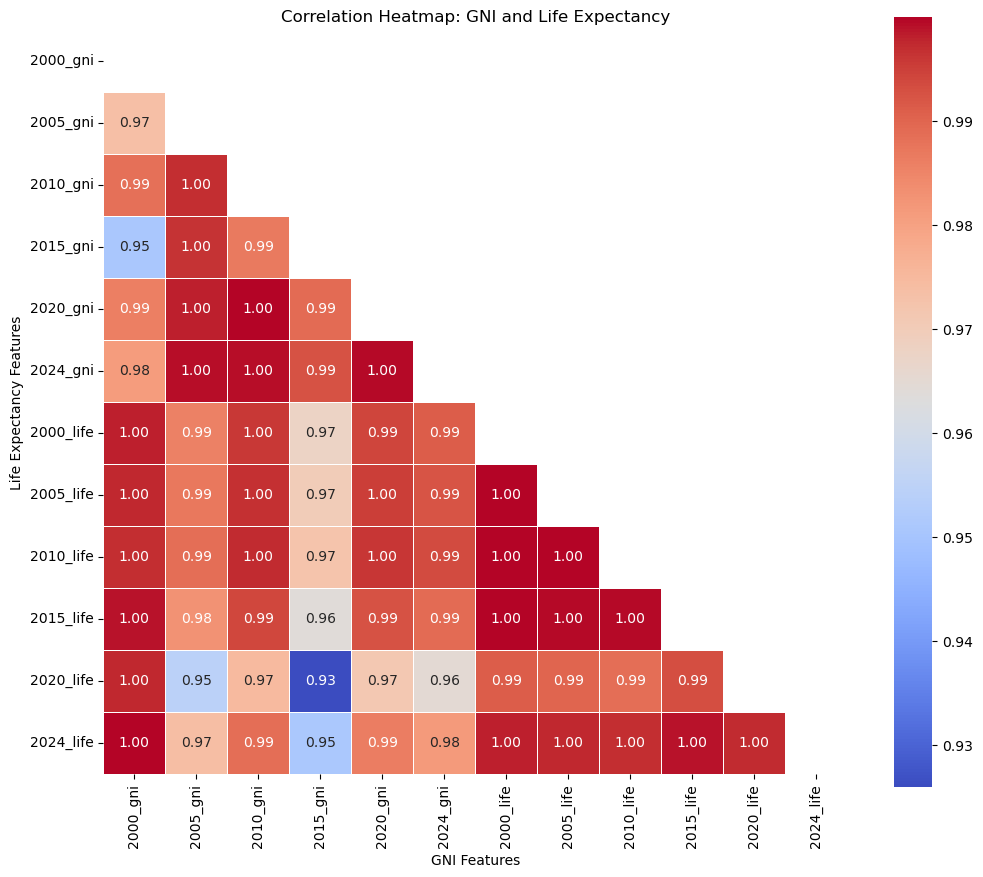

In [231]:
# heatmap with the entire df was to large
# so just selected the years I want shown
years_of_interest = ['2000_gni', '2005_gni', '2010_gni', '2015_gni', '2020_gni', '2024_gni',
                      '2000_life', '2005_life', '2010_life', '2015_life', '2020_life', '2024_life']

# grouped the df to include only the columns of interest
subset_df = merged_df1[years_of_interest]

correlation_matrix = subset_df.corr()

#code logic from 2.03 dat vizua
mask = np.triu(np.ones_like(subset_df.corr()))

plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap: GNI and Life Expectancy')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, mask=mask)
plt.xlabel('GNI Features')
plt.ylabel('Life Expectancy Features')
plt.show()

**Interpretation:**

The heatmap represent the amount of correlation between GNI and Life Expectency features represented by colors. Some observation are listed below:

- The larger the number and darker the color the higher the correlation between the two variables. In this context, it would suggest that as GNI increases, life expectancy also tends to increase, and vice versa.
- All values are close to 1 and are in the 0.8 <= r <= 1.0 which indicates very highly correlation based of the scale of correlation coefficent chart

**Summary**

The heatmap indicates a strong, positive relationship between GNI and life expectancy, but it is important to not that correlation does not imply causation, which means other factors could be influencing both variables. As such, further analysis are necessary to establish causation

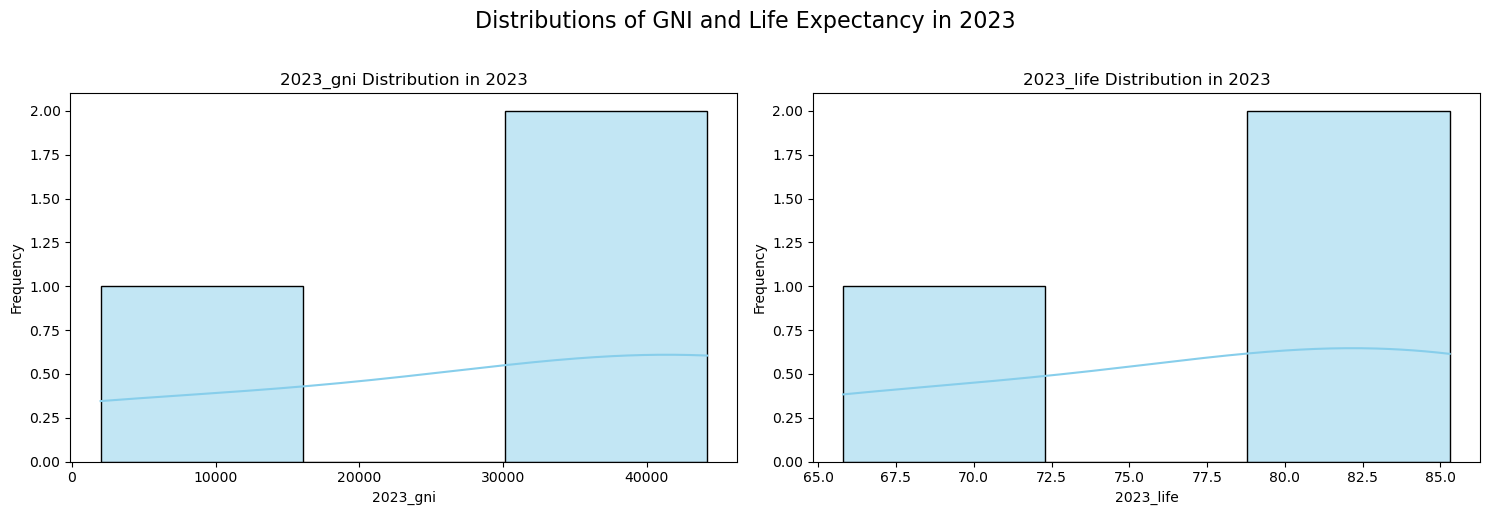

In [199]:
target_year = '2023'

# logic https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle(f'Distributions of GNI and Life Expectancy in {target_year}', y=1.02, fontsize=16)

# Define columns of interest for the target year
columns_of_interest = [col for col in merged_df1.columns if target_year in col and (col.endswith('_gni') or col.endswith('_life'))]

# Select relevant columns from the dataset
subset_df = merged_df1[columns_of_interest]

# Iterate through columns and plot histograms
for i, col in enumerate(columns_of_interest):
    sns.histplot(subset_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Distribution in {target_year}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.tight_layout()
plt.show()


**Interpretation:** 

The histogram provides a representation of the distribution of values for each variable (GNI and Life Expectancy) in the selected year (2023). The line going across the histogram resembles a normal distribution, as such it suggest that the data follow a bell shape curve that indicates that it may have a tendency to follow a normal distribution pattern. This is important when assuming normaility in data 

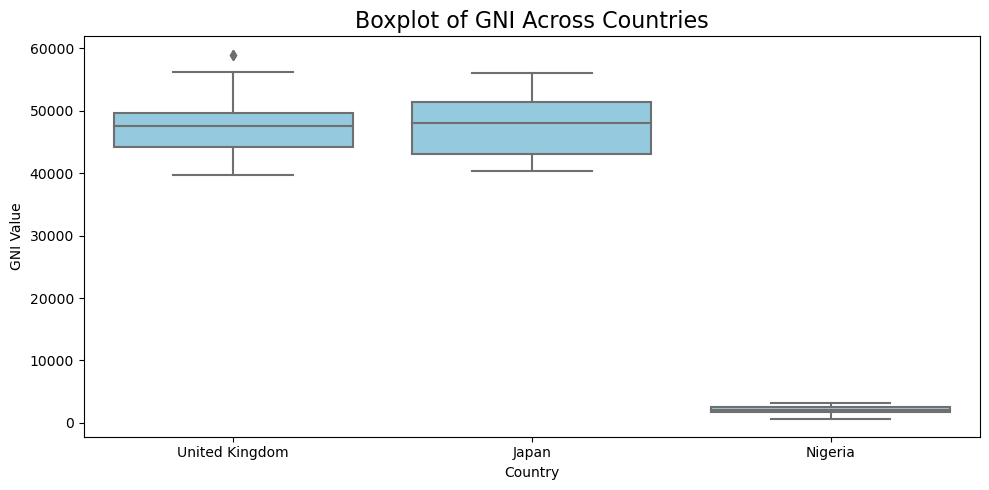

In [140]:
#Had to transpose the DataFrame
transposed_df = merged_df1.T

# Set up subplots
fig, ax = plt.subplots(figsize=(10, 5))

# logic attained from https://digitaschools.com/box-plots-in-python-advanced-charts/
# boxplot for transposed df
gni_plot = sns.boxplot(x='variable', y='value', data=transposed_df[transposed_df.index.str.endswith('_gni')].melt(), ax=ax, palette=['skyblue'])
ax.set_title('Boxplot of GNI Across Countries', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('GNI Value')
gni_plot.set_xticklabels(merged_df1['country'])  

plt.tight_layout()
plt.show()


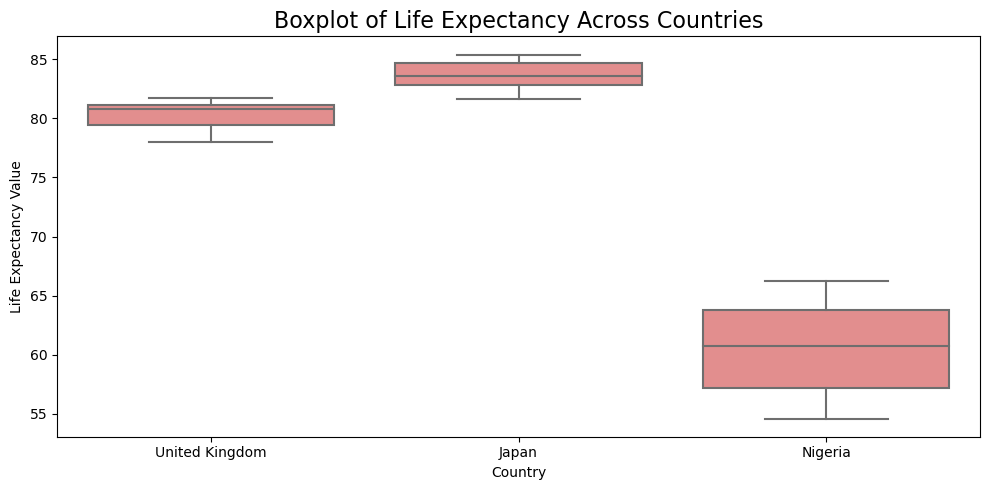

In [141]:
# same logic as above
fig, ax = plt.subplots(figsize=(10, 5))

# Boxplot for Life Expectancy
life_plot = sns.boxplot(x='variable', y='value', data=transposed_df[transposed_df.index.str.endswith('_life')].melt(), ax=ax, palette=['lightcoral'])
ax.set_title('Boxplot of Life Expectancy Across Countries', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Life Expectancy Value')
life_plot.set_xticklabels(merged_df1['country'])  # Set x-axis tick labels

plt.tight_layout()
plt.show()


**Interpretation:** The box plot highlights the central tendency, spread, and skewness of the data, as well as the presence of outliers. From the result, it shows that mostly the data are symmetrical due to the median being in the center of the box, while for United Kingdom life expectency, the data are positively skewd. The data also confirms with the scatterplot that shows potential outliers for each data.



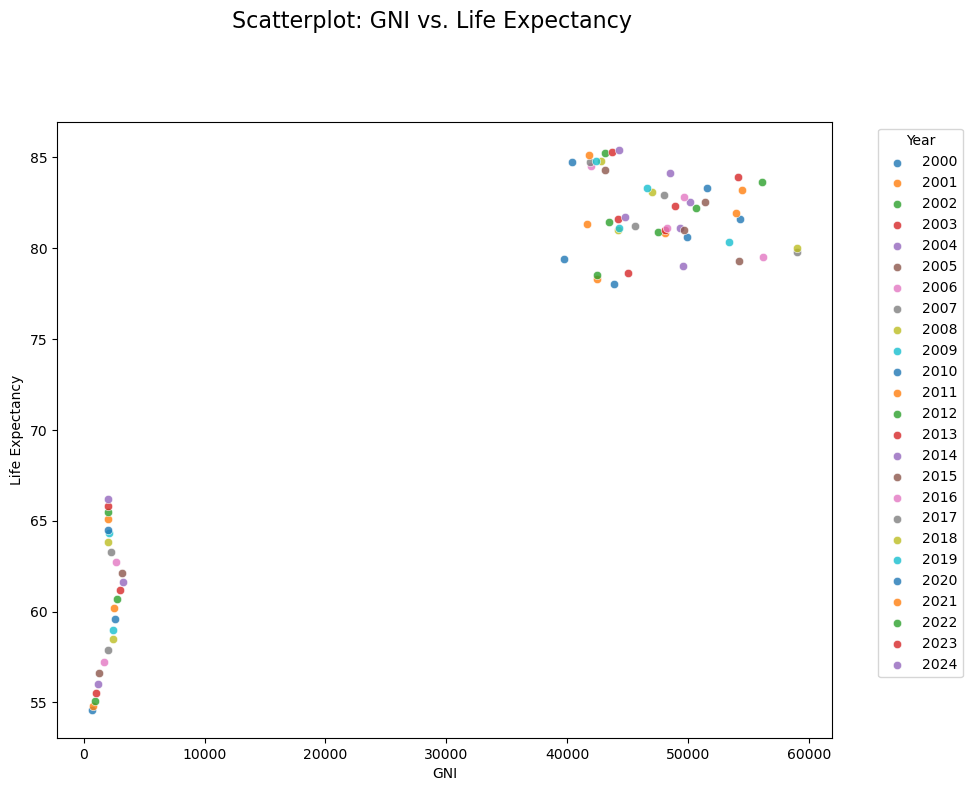

In [151]:
# Scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Scatterplot: GNI vs. Life Expectancy', y=1.02, fontsize=16)

# Scatterplot for each year
for year in range(2000, 2025, 1):
    gni_col = f'{year}_gni'
    life_col = f'{year}_life'
    scatter_plot = sns.scatterplot(x=merged_df1[gni_col], y=merged_df1[life_col], ax=ax, label=str(year), alpha=0.8)

# Add labels and legend
ax.set_xlabel('GNI')
ax.set_ylabel('Life Expectancy')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




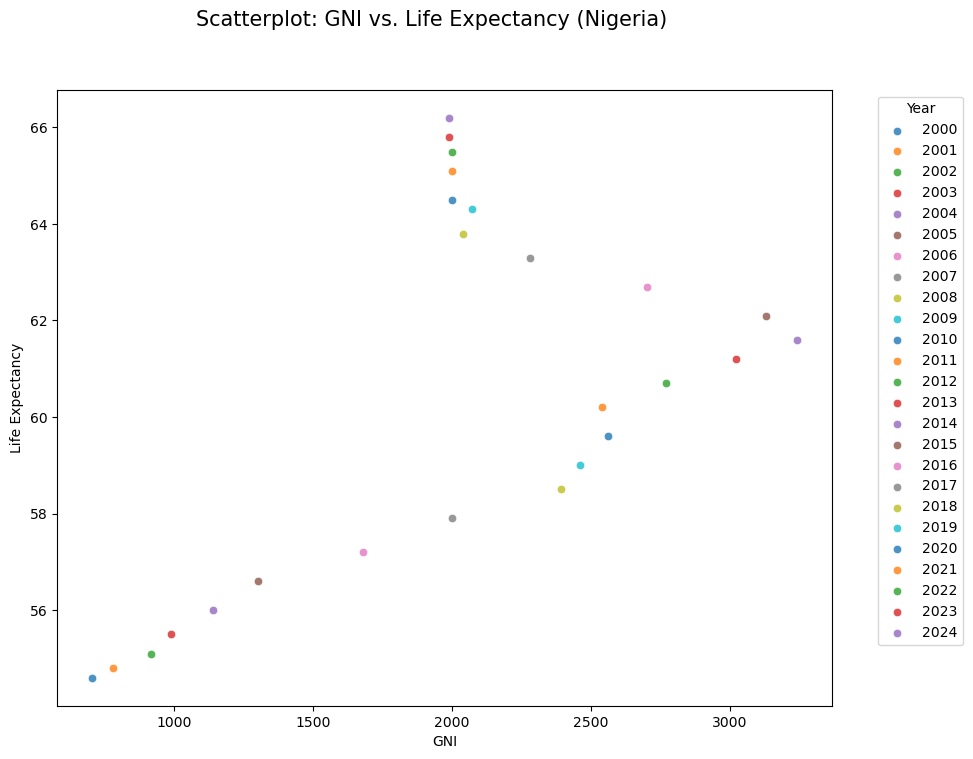

In [182]:
# Scatterplot for Nigeria only
nig_df = merged_df1[merged_df1['country'] == 'Nigeria']

# Scatterplot size
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Scatterplot: GNI vs. Life Expectancy (Nigeria)', fontsize=15)

# Scatterplot for each year increment by 2
for year in range(2000, 2025, 1):
    gni_col = f'{year}_gni'
    life_col = f'{year}_life'
    scatter_plot = sns.scatterplot(x=nig_df[gni_col], y=nig_df[life_col], ax=ax, label=str(year), alpha=0.8)

#label, legends
ax.set_xlabel('GNI')
ax.set_ylabel('Life Expectancy')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Interpretation:**

In general, it appears that most of the data points are following a linear pattern indicating that as GNI increases, life expectancy increase. This is particular noted in a developing country of Nigeria. The farther to the right we move, the farther up the points move. There is one large cluster of points that follows this pattern. However, there are some outliers that do not fit the general pattern. Considering that the GNI for Nigeria is so low compared to UK and Japan we can assume that with the combined scatterplot that more econmic invesment is needed in a country like nigeria to help increase life expectency and promote Sustainable Development Goals initiatives.  

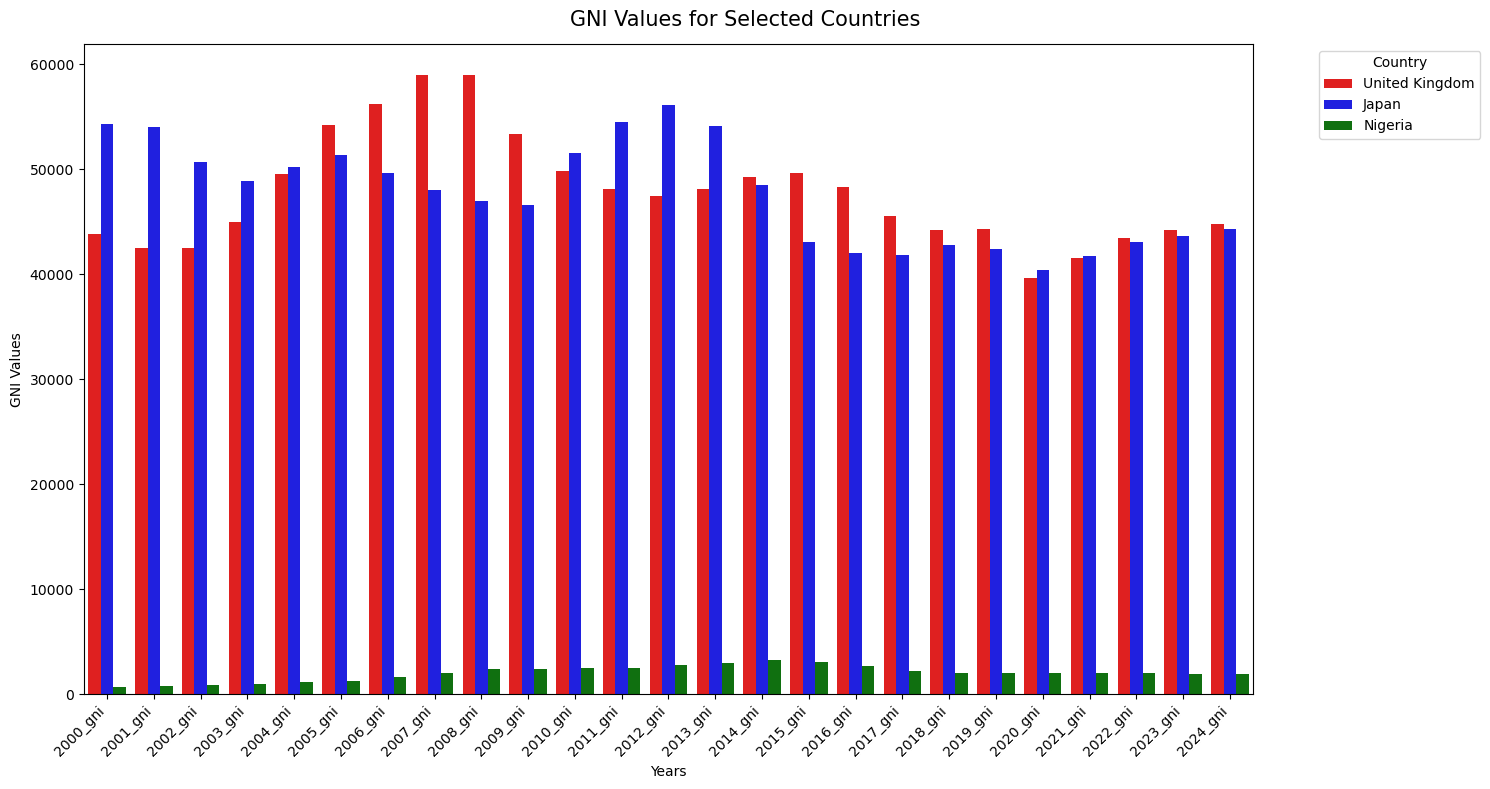

In [219]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('GNI Values for Selected Countries', fontsize=15)

# code logic attained from https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function
melted_data = selected_countries_data.melt(id_vars='country', value_vars=gni_columns, var_name='Year', value_name='GNI')

colors = {'United Kingdom': 'red', 'Japan': 'blue', 'Nigeria': 'green'}

# code logic attained from lesson 2.06
sns.barplot(x='Year', y='GNI', hue='country', data=melted_data, palette=colors, ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('GNI Values')
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


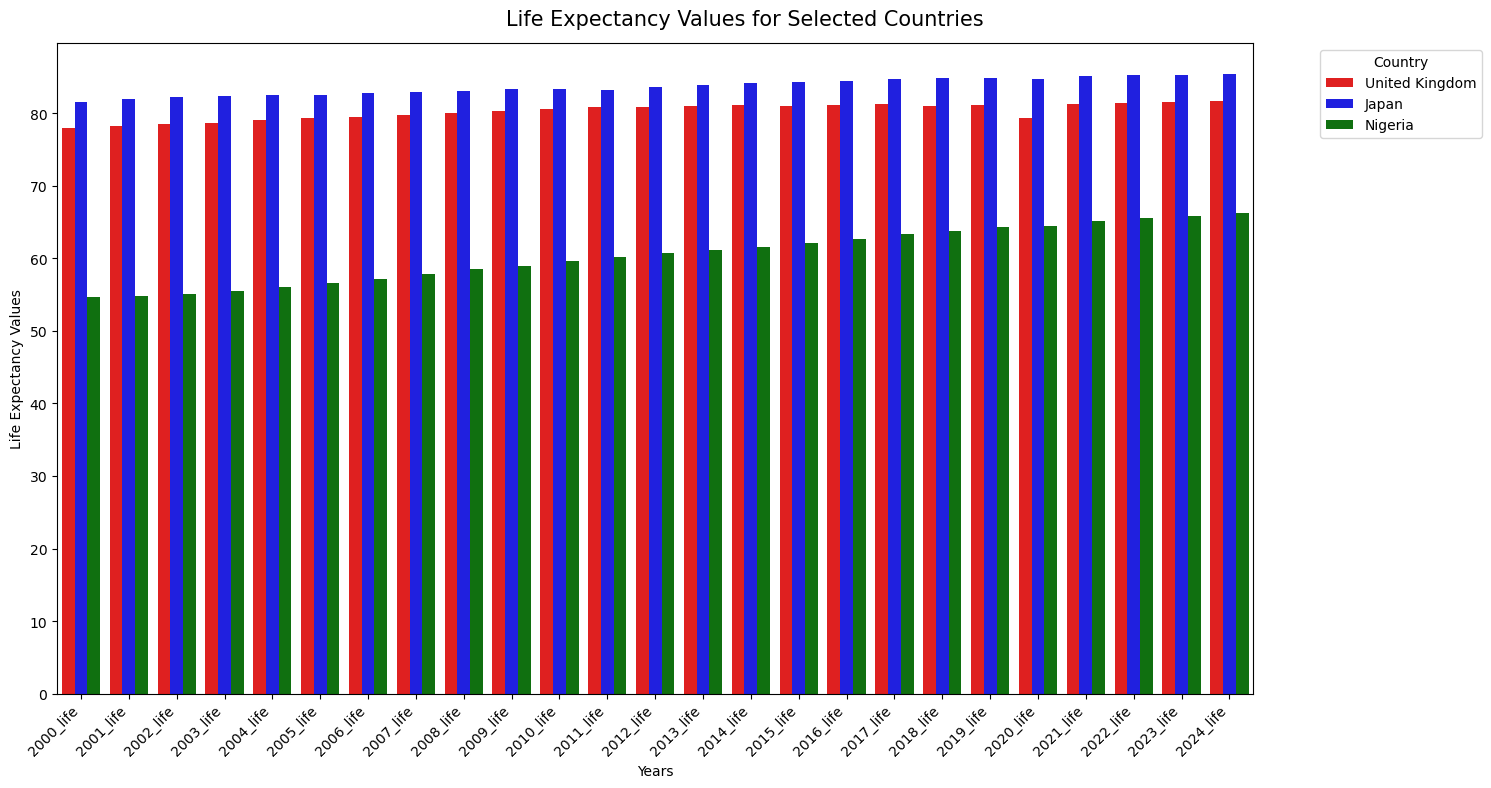

In [227]:
#same logic as above

fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Life Expectancy Values for Selected Countries', fontsize=15)

#code logic attained from lesson 2.06
sns.barplot(x='Year', y='Life Expectancy', hue='country', data=melted_data, palette=colors, ax=ax)

#labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Life Expectancy Values')
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


**Interpretation**

The country with the highest life expectancy is Japan in the year 2024 with a value of 85.4, the country with the highest gni is United Kingdom in the year 2007 and 2008 with a value of 59000,the country with the lowest life expectancy is Nigeria in the year 2000 with a value of 54.6. and the country with the lowest gni is Nigeria in the year 2000 gni with a value of 705. These insights aligns with the robust, positive relationship highlighted between GNI and life expectancy in the other visual, where countries that has higher GNI tends to have higer life expectancy.


## Conclusions and Recommendations

This project looked at investigating the relationship between economic resources and life expectancy to inform strategic decision-making on sustainable development goals. The correlation analysis done in the exploratory data analysis phase provides a quantitative measure of the relationship between GNI and life expectancy for countries of Nigeria, Japan and United Kingdom. The information found in this project is valuable to key stakeholders in any vertices who seek to understand the degree to which economic resources are correlated to life expectency.

The robust and increasing positive correlation indicates that as economic resources (GNI) increase, life expectancy tends to increase as well. This statement put forwards actionable insight that can be crucial for decision-makers, for the reason that it proposes that investments in economic development may have positive implications for the health and longevity of the population. 

Managers, Lawmakers, and CEO who has interest in and want to justify their economic development initiatives, would be able to make more informed decision regarding resource allocation, investment and strategic planning with presentation of the data in this project. For example, if there is a sudden drop in economic indicators, decision-makers can anticipate potential impacts on public health and take proactive measures. Moreover, lawmakers can use the insight taken from this data to formulate evidence based laws that promote economic and health-related goals. CEO and other key decision makers who works in healthcare could use this insight to justify efforts to improve healthcare system. 

Further recommendation of research can be found in the work done by Nandi et al.,(2023) where he stated that GNI, employment rate, and age dependency ratio are the top determinants of life expectancy (LE). The growth of Gross National Income and employment facilities can contribute to decreasing the age dependency ratio and increasing the LE (Nandi et al., 2023). The insight dereived from this work and this project advocates for sustainable development goals that is a call to action to end poverty and inequality, protect the planet, and ensure that all people enjoy health, justice and prosperity (Sustainable Development Goals, 2023).


Reference: Nandi, D. C., Hossain, Md. F., Roy, P., &amp; Ullah, M. S. (2023). An investigation of the relation between life expectancy &amp; socioeconomic variables using path analysis for Sustainable Development Goals (SDG) in Bangladesh. PLOS ONE, 18(2). https://doi.org/10.1371/journal.pone.0275431 

Sustainable development goals. (2023, November 16). https://www.who.int/europe/about-us/our-work/sustainable-development-goals#:~:text=The%20Sustainable%20Development%20Goals%20(SDGs,no%20one%20is%20left%20behind.